In [2]:
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

In [3]:
import pandas as pd 

df = pd.DataFrame.from_csv('.\Data\cat2_full_categories.txt', sep='\t', header=0)

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
len(df)

496009

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,state,id,link,county,newspaper,date,content,notice_id,category
0,1,1,1,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Notice of Auction\nOn Friday, March 17, 2017 a...",23983816.0,['Auctions']
1,9,9,9,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"Public Notice\nOn October 28, 2015, the PA Sta...",23983815.0,['License Suspension']
2,16,16,16,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,Click to view PDF.\n\nREPAYMENT CONTRACT FOR S...,24045793.0,[]
3,17,17,17,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,NOTICE OF MEDICAL PRACTICE CLOSURE:\nEffective...,23983812.0,[]
4,19,19,19,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,Fort Smith Port Authority is requesting sealed...,23983801.0,[]


In [6]:
category = df.category.unique()

In [7]:
print(category)

["['Auctions']" "['License Suspension']" '[]' ...
 "['Ordinances', 'Public Hearings', 'Bids', 'Bids', 'Bids', 'Auctions', 'Bids', 'Government Notices', 'Public Hearings', 'Tax Notice', 'Bids', 'Public Hearings', 'Auctions']"
 "['Property Notice', 'Bids', 'Miscellaneous', 'Bids', 'Bids', 'Auctions', 'Auctions']"
 "['Ordinances', 'Probate Notices', 'Miscellaneous', 'Foreclosures', 'Lien Sales', 'Miscellaneous', 'Property Notice', 'Government Notices', 'Auctions', 'Probate Notices', 'Tax Notice', 'Notice to Interested Persons', 'Auctions']"]


In [8]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
import pandas as pd

df['content'] =df['content'].astype(str)

In [10]:
df.head(500).to_csv('filterred.csv', index=False, )

In [9]:
df['content'] =df['content'].str.lower()
texts = df['content'].tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
df['POS'] = tagged_texts

In [10]:
print(len(df))
df.head()

496009


,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,state,id,link,county,newspaper,date,content,notice_id,category,POS
0,1,1,1,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"notice of auction\non friday, march 17, 2017 a...",23983816.0,['Auctions'],"[(notice, NN), (of, IN), (auction, NN), (on, I..."
1,9,9,9,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"public notice\non october 28, 2015, the pa sta...",23983815.0,['License Suspension'],"[(public, JJ), (notice, NN), (on, IN), (octobe..."
2,16,16,16,Wyoming,3493/3302017_24045793,http://www.publicnoticeads.com/WY/search/view....,Fremont,Riverton Ranger,2017/02/24,click to view pdf.\n\nrepayment contract for s...,24045793.0,[],"[(click, NN), (to, TO), (view, VB), (pdf, NN),..."
3,17,17,17,Mississippi,626/2272017_23983812,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,notice of medical practice closure:\neffective...,23983812.0,[],"[(notice, NN), (of, IN), (medical, JJ), (pract..."
4,19,19,19,Arkansas,3147/2272017_23983801,http://www.publicnoticeads.com/AR/search/view....,Sebastian,Times Record (Fort Smith),2017/02/24,fort smith port authority is requesting sealed...,23983801.0,[],"[(fort, NN), (smith, NN), (port, NN), (authori..."


In [12]:
TAG = ['RB','WRB','IN','TO','VB','VBD','VBG','VBN','VBP','VBZ','WP','CC','CD','DT','FW','JJ','LS','MD','NN','NNS','PRP','PRP$']

In [13]:
from collections import Counter

def apply_tagging(row):
    
    pos_tag = []
    tagged = row
    for t in tagged:
        word , tag = t
        if tag in TAG:
            pos_tag.append(tag)
    
    cnt = Counter(pos_tag)
    return cnt

In [14]:
df['pos_dist'] = df.head(1000).POS.progress_apply(apply_tagging)

In [22]:
import nltk
from nltk.tag.stanford import StanfordNERTagger
import os
java_path = "C:\\Program Files\\Java\\jdk-10.0.2\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

sentence = u"Twenty miles east of Reno, Nev., " \
    "where packs of wild mustangs roam free through " \
    "the parched landscape, Tesla Gigafactory 1 " \
    "sprawls near Interstate 80."

jar = '.\\stanford-ner-2018-02-27\\stanford-ner.jar'
model = '.\\stanford-ner-2018-02-27\\classifiers\\english.all.3class.distsim.crf.ser.gz'

# Prepare NER tagger with english model
ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

def ner_tagging(row):
    # Tokenize: Split sentence into words
    words = nltk.word_tokenize(row)
    # Run NER tagger on words
    #print(ner_tagger.tag(words))
    return ner_tagger.tag(words)

In [23]:
df['ner'] = df.content.head(50).progress_apply(ner_tagging)

In [21]:
df.head(1000).to_csv('tagged.csv')

In [13]:
df_pos = pd.DataFrame(df['pos_dist'].values.tolist(), index=df.index)

In [14]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,RB,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB
0,1.0,13.0,2.0,NaN,5.0,3.0,NaN,1.0,12.0,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2.0,5.0,6.0,NaN,6.0,5.0,NaN,NaN,15.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN
2,4.0,20.0,17.0,NaN,26.0,12.0,NaN,1.0,53.0,7.0,...,NaN,6.0,8.0,NaN,2.0,6.0,NaN,2.0,NaN,NaN
3,3.0,12.0,8.0,NaN,18.0,23.0,NaN,3.0,27.0,11.0,...,2.0,4.0,8.0,NaN,3.0,4.0,1.0,1.0,NaN,NaN
4,NaN,6.0,1.0,NaN,7.0,4.0,NaN,NaN,13.0,4.0,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN


In [15]:
df_pos = df_pos.fillna(0)

In [16]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,RB,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB
0,1.0,13.0,2.0,0.0,5.0,3.0,0.0,1.0,12.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,6.0,0.0,6.0,5.0,0.0,0.0,15.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
2,4.0,20.0,17.0,0.0,26.0,12.0,0.0,1.0,53.0,7.0,...,0.0,6.0,8.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0
3,3.0,12.0,8.0,0.0,18.0,23.0,0.0,3.0,27.0,11.0,...,2.0,4.0,8.0,0.0,3.0,4.0,1.0,1.0,0.0,0.0
4,0.0,6.0,1.0,0.0,7.0,4.0,0.0,0.0,13.0,4.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [17]:
col = df_pos.columns.tolist()
print(col)

['CC', 'CD', 'DT', 'FW', 'IN', 'JJ', 'LS', 'MD', 'NN', 'NNS', 'PRP', 'PRP$', 'RB', 'TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WP', 'WRB']


In [18]:
df_pos['total'] = df_pos.sum(axis=1)

In [19]:
df_pos.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
0,1.0,13.0,2.0,0.0,5.0,3.0,0.0,1.0,12.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0
1,2.0,5.0,6.0,0.0,6.0,5.0,0.0,0.0,15.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,52.0
2,4.0,20.0,17.0,0.0,26.0,12.0,0.0,1.0,53.0,7.0,...,6.0,8.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0,165.0
3,3.0,12.0,8.0,0.0,18.0,23.0,0.0,3.0,27.0,11.0,...,4.0,8.0,0.0,3.0,4.0,1.0,1.0,0.0,0.0,132.0
4,0.0,6.0,1.0,0.0,7.0,4.0,0.0,0.0,13.0,4.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,39.0


In [20]:
df_norm = df_pos.div(df_pos.total, axis=0)

In [21]:
df_norm.head()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
0,0.024390,0.317073,0.048780,0.0,0.121951,0.073171,0.0,0.024390,0.292683,0.000000,...,0.000000,0.024390,0.024390,0.024390,0.000000,0.000000,0.000000,0.0,0.0,1.0
1,0.038462,0.096154,0.115385,0.0,0.115385,0.096154,0.0,0.000000,0.288462,0.019231,...,0.038462,0.038462,0.038462,0.019231,0.038462,0.019231,0.000000,0.0,0.0,1.0
2,0.024242,0.121212,0.103030,0.0,0.157576,0.072727,0.0,0.006061,0.321212,0.042424,...,0.036364,0.048485,0.000000,0.012121,0.036364,0.000000,0.012121,0.0,0.0,1.0
3,0.022727,0.090909,0.060606,0.0,0.136364,0.174242,0.0,0.022727,0.204545,0.083333,...,0.030303,0.060606,0.000000,0.022727,0.030303,0.007576,0.007576,0.0,0.0,1.0
4,0.000000,0.153846,0.025641,0.0,0.179487,0.102564,0.0,0.000000,0.333333,0.102564,...,0.025641,0.000000,0.000000,0.025641,0.025641,0.000000,0.025641,0.0,0.0,1.0


In [22]:
df_norm.loc['sum'] = df_norm.sum(axis=0)

In [23]:
df_norm.tail()

,CC,CD,DT,FW,IN,JJ,LS,MD,NN,NNS,...,TO,VB,VBD,VBG,VBN,VBP,VBZ,WP,WRB,total
496005,0.049477,0.059930,0.137282,0.002091,0.160976,0.068293,0.00000,0.022997,0.250174,0.066202,...,0.022300,0.035540,0.003484,0.011150,0.044599,0.011847,0.016028,0.001394,0.000000,1.0
496006,0.018349,0.064220,0.100917,0.000000,0.137615,0.137615,0.00000,0.000000,0.311927,0.027523,...,0.000000,0.018349,0.018349,0.027523,0.027523,0.036697,0.036697,0.000000,0.000000,1.0
496007,0.011236,0.067416,0.101124,0.000000,0.191011,0.101124,0.00000,0.000000,0.359551,0.044944,...,0.011236,0.011236,0.011236,0.000000,0.022472,0.022472,0.011236,0.000000,0.000000,1.0
496008,0.018868,0.198113,0.018868,0.000000,0.028302,0.254717,0.00000,0.000000,0.367925,0.047170,...,0.000000,0.000000,0.028302,0.000000,0.009434,0.018868,0.000000,0.000000,0.000000,1.0
sum,17202.624305,42865.798706,48323.924976,1193.595281,63748.432071,47051.415984,0.52437,6634.547177,160044.320273,23307.814665,...,10452.034038,14819.116973,6176.239216,5495.640038,17783.201377,6014.636818,8654.250370,817.474567,173.038156,495835.0


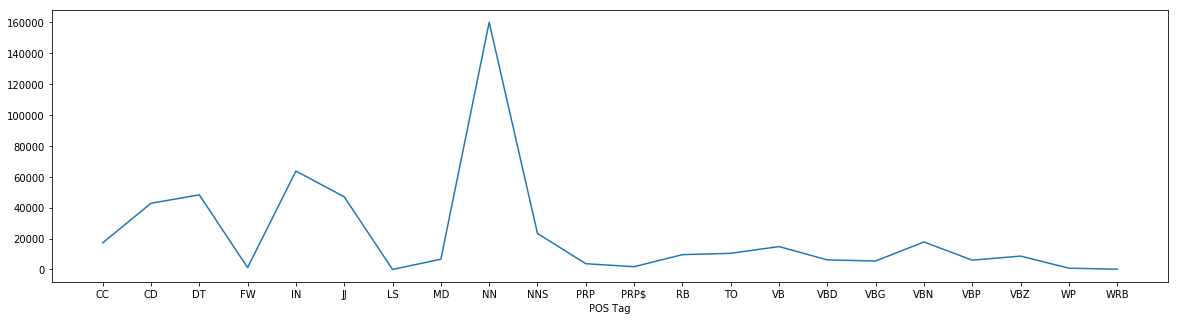

In [25]:
from matplotlib import pyplot as plt

row = df_norm.loc['sum']
row = row[:-1]
row.plot(figsize = (20,5))
plt.xticks(range(len(col)),col)
plt.xlabel('POS Tag')
plt.show()